# Stock Analysis of Automobile Giants

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [2]:
from datetime import datetime

### Importing Datasets of Tesla, Ford & GM

In [3]:
tesla = pd.read_csv("Tesla_Stock.csv",index_col="Date",parse_dates=True)

In [4]:
tesla.head()

,Open,High,Low,Close,Volume
Date,,,,,
2012-01-03,28.94,29.50,27.65,28.08,928052
2012-01-04,28.21,28.67,27.50,27.71,630036
2012-01-05,27.76,27.93,26.85,27.12,1005432
2012-01-06,27.20,27.79,26.41,26.89,687081
2012-01-09,27.00,27.49,26.12,27.25,896951


In [5]:
ford = pd.read_csv("Ford_Stock.csv",index_col="Date",parse_dates=True)

In [6]:
ford.head()

,Open,High,Low,Close,Volume
Date,,,,,
2012-01-03,11.00,11.25,10.99,11.13,45709811
2012-01-04,11.15,11.53,11.07,11.30,79725188
2012-01-05,11.33,11.63,11.24,11.59,67877467
2012-01-06,11.74,11.80,11.52,11.71,59840605
2012-01-09,11.83,11.95,11.70,11.80,53981467


In [7]:
GM = pd.read_csv("GM_Stock.csv",index_col="Date",parse_dates=True)

In [8]:
GM.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2016-12-23,35.83,35.87,35.54,35.69,9351152
2016-12-27,35.80,35.93,35.50,35.54,6008707
2016-12-28,35.74,35.80,35.13,35.15,8451852
2016-12-29,35.25,35.48,35.12,35.14,4416668
2016-12-30,35.21,35.31,34.67,34.84,7646079


In [9]:
lower_limit = datetime(2012,1,1)
upper_limit = datetime(2016,12,30)

### Visualising Opening Price of the Stocks

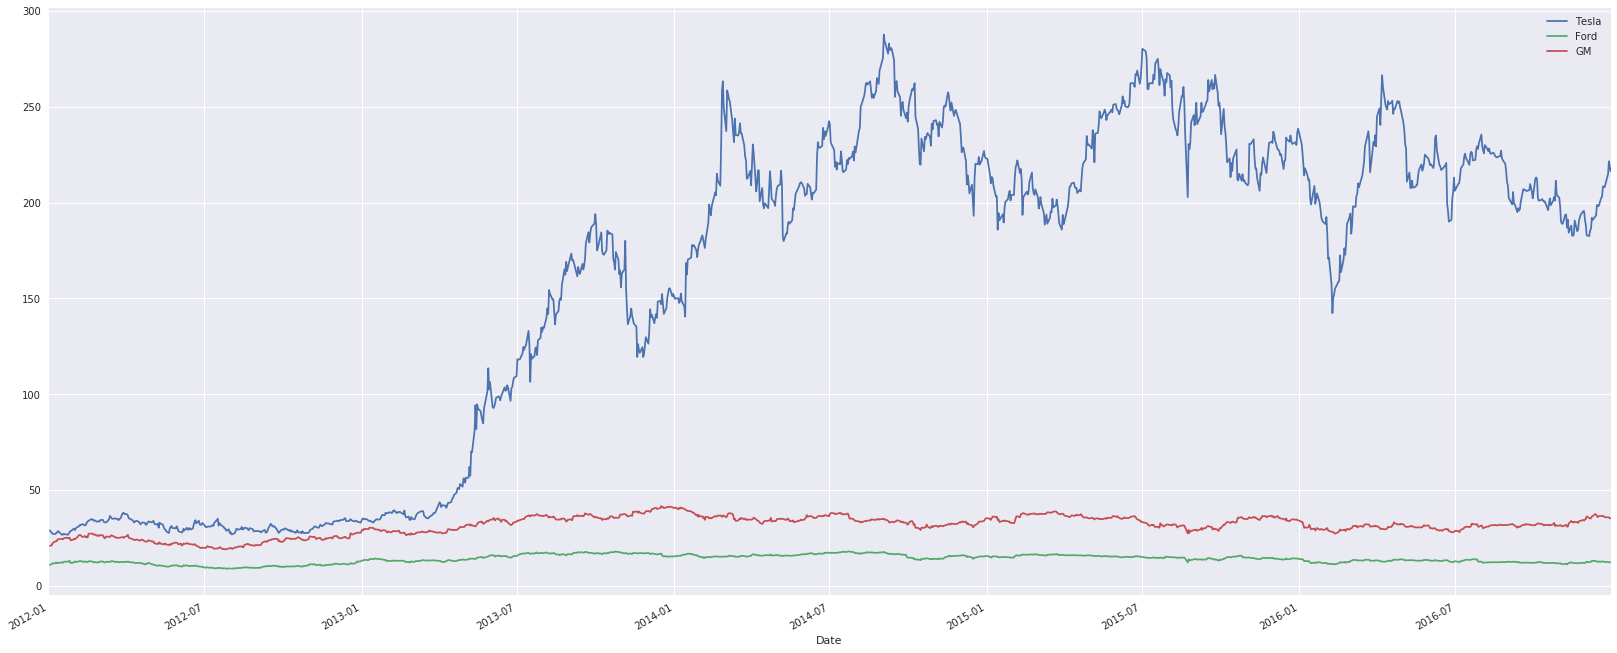

In [10]:
tesla['Open'].plot(figsize=(28,12),label="Tesla",xlim=[lower_limit, upper_limit])
ford['Open'].plot(figsize=(28,12),label="Ford",xlim=[lower_limit, upper_limit])
GM['Open'].plot(figsize=(28,12),label="GM",xlim=[lower_limit, upper_limit])
plt.legend()

### Volume of the Stock Traded each day

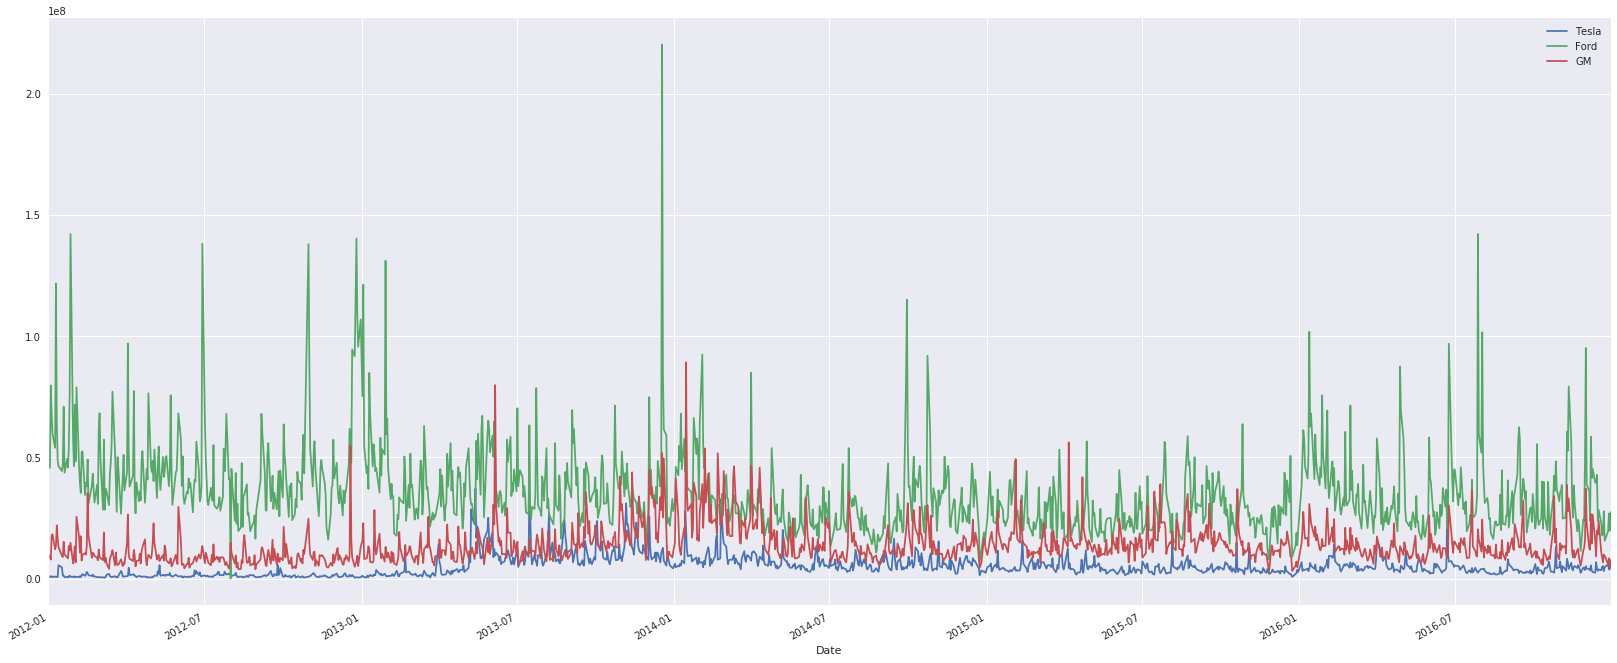

In [11]:
tesla['Volume'].plot(figsize=(28,12),label="Tesla",xlim=[lower_limit, upper_limit])
ford['Volume'].plot(figsize=(28,12),label="Ford",xlim=[lower_limit, upper_limit])
GM['Volume'].plot(figsize=(28,12),label="GM",xlim=[lower_limit, upper_limit])
plt.legend()

### Interestingly, Ford has an all-time Stock Sold Volume Hike Lets find that Event's TimeStamp

In [12]:
Ford_Max = ford['Volume'].idxmax()
Tesla_Max = tesla['Volume'].idxmax()
GM_Max = GM['Volume'].idxmax()

In [13]:
print("Ford: {}\nTesla: {}\nGM: {}".format(Ford_Max.date(), Tesla_Max.date(), GM_Max.date()))

Ford: 2013-12-18
Tesla: 2013-05-14
GM: 2014-01-15


### Now just the Opening Stock Prices make us feel that Tesla had always been more valuable then GM and Ford but this factor alone is not enough because the total Market Capital depends on many factors. However Lets take out the "Total Traded" for each Firm.


In [14]:
tesla["Total Traded"] = tesla['Open']*tesla['Volume']

In [15]:
ford["Total Traded"] = ford['Open']*ford['Volume']

In [16]:
GM["Total Traded"] = GM['Open']*GM['Volume']

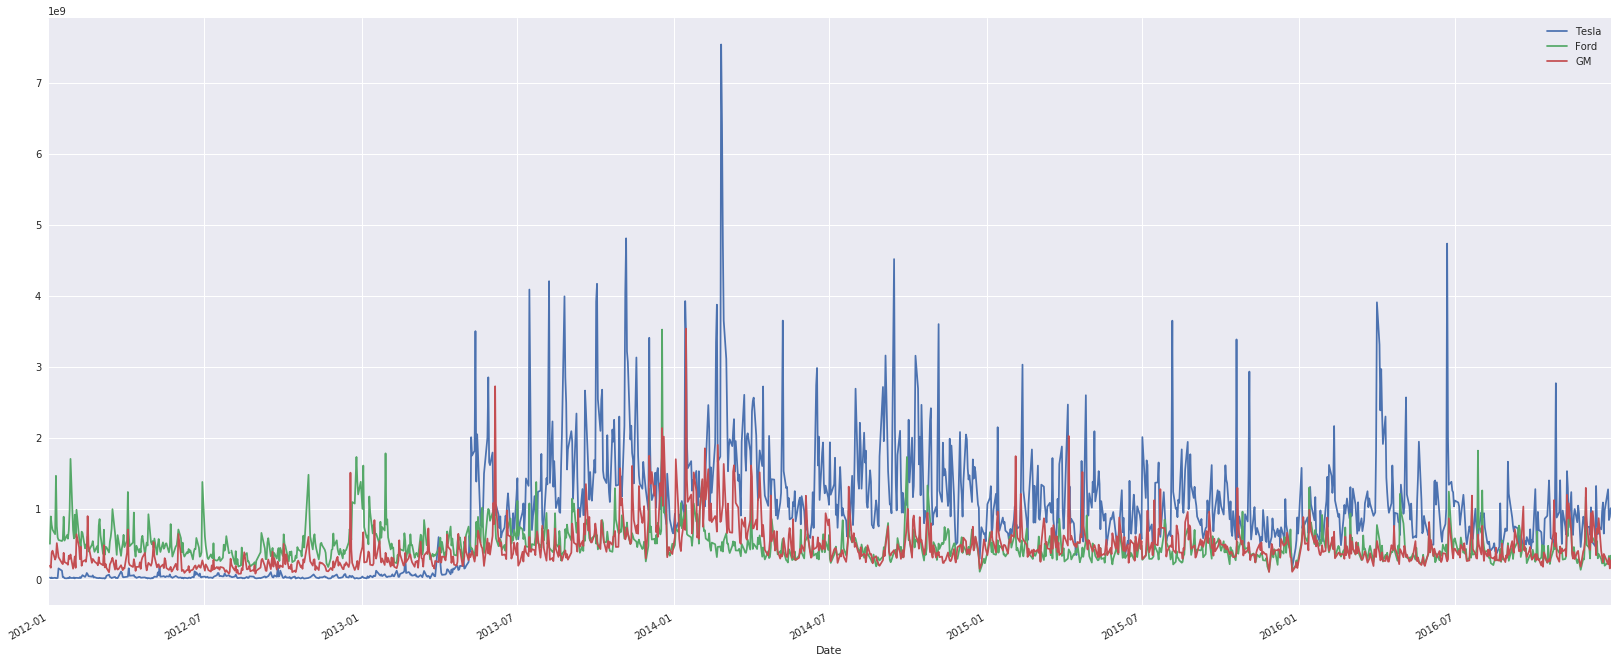

In [17]:
tesla['Total Traded'].plot(figsize=(28,12),label="Tesla",xlim=[lower_limit, upper_limit])
ford['Total Traded'].plot(figsize=(28,12),label="Ford",xlim=[lower_limit, upper_limit])
GM['Total Traded'].plot(figsize=(28,12),label="GM",xlim=[lower_limit, upper_limit])
plt.legend()

### Again we see Tesla has a all-time peak in Total Traded, lets find out that date

In [18]:
Tesla_Max = tesla['Total Traded'].idxmax()
Ford_Max = ford['Total Traded'].idxmax()
GM_Max = GM['Total Traded'].idxmax()

In [19]:
print("Tesla: {}\nFord: {}\nGM: {}".format(Tesla_Max.date(), Ford_Max.date(), GM_Max.date()))

Tesla: 2014-02-25
Ford: 2013-12-18
GM: 2014-01-15


## Now the data is too noisy in the Open column for each firm lets calculate Moving Averages to get a better intuition for each firm

### Tesla

In [20]:
tesla["MA50"] = tesla["Open"].rolling(50).mean()
tesla["MA200"] = tesla["Open"].rolling(200).mean()

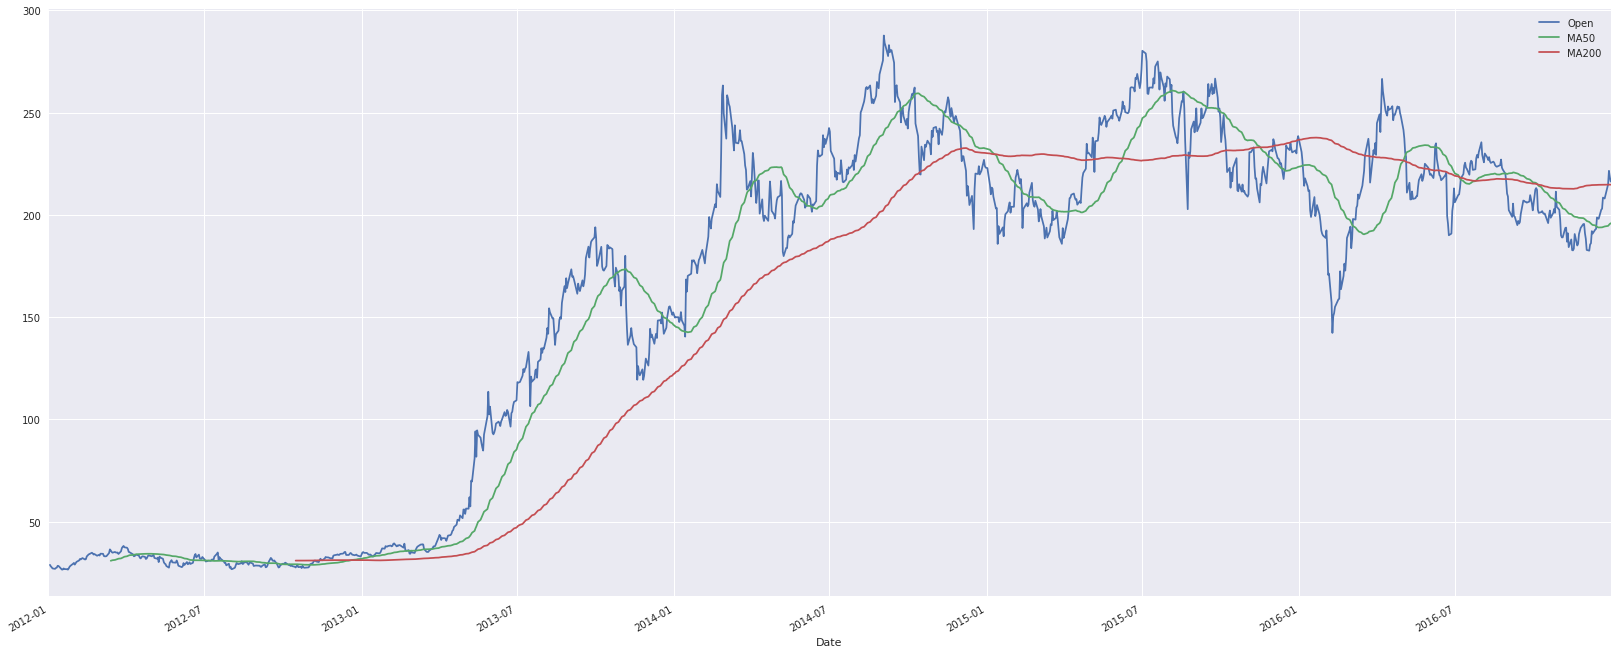

In [21]:
tesla[["Open","MA50","MA200"]].plot(figsize=(28,12),xlim=[lower_limit, upper_limit])

### Ford

In [22]:
ford["MA50"] = ford["Open"].rolling(50).mean()
ford["MA200"] = ford["Open"].rolling(200).mean()

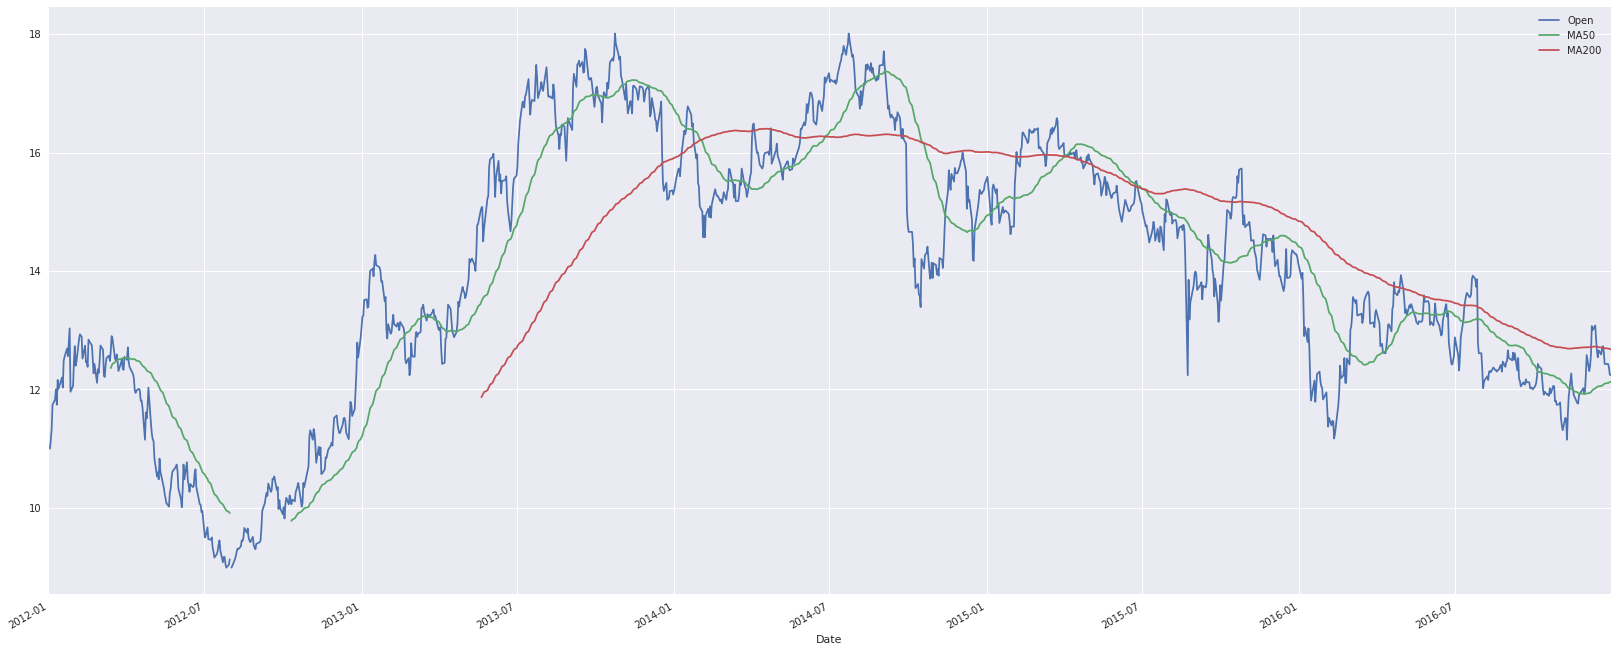

In [23]:
ford[["Open","MA50","MA200"]].plot(figsize=(28,12),xlim=[lower_limit, upper_limit])

### GM

In [24]:
GM["MA50"] = GM["Open"].rolling(50).mean()
GM["MA200"] = GM["Open"].rolling(200).mean()

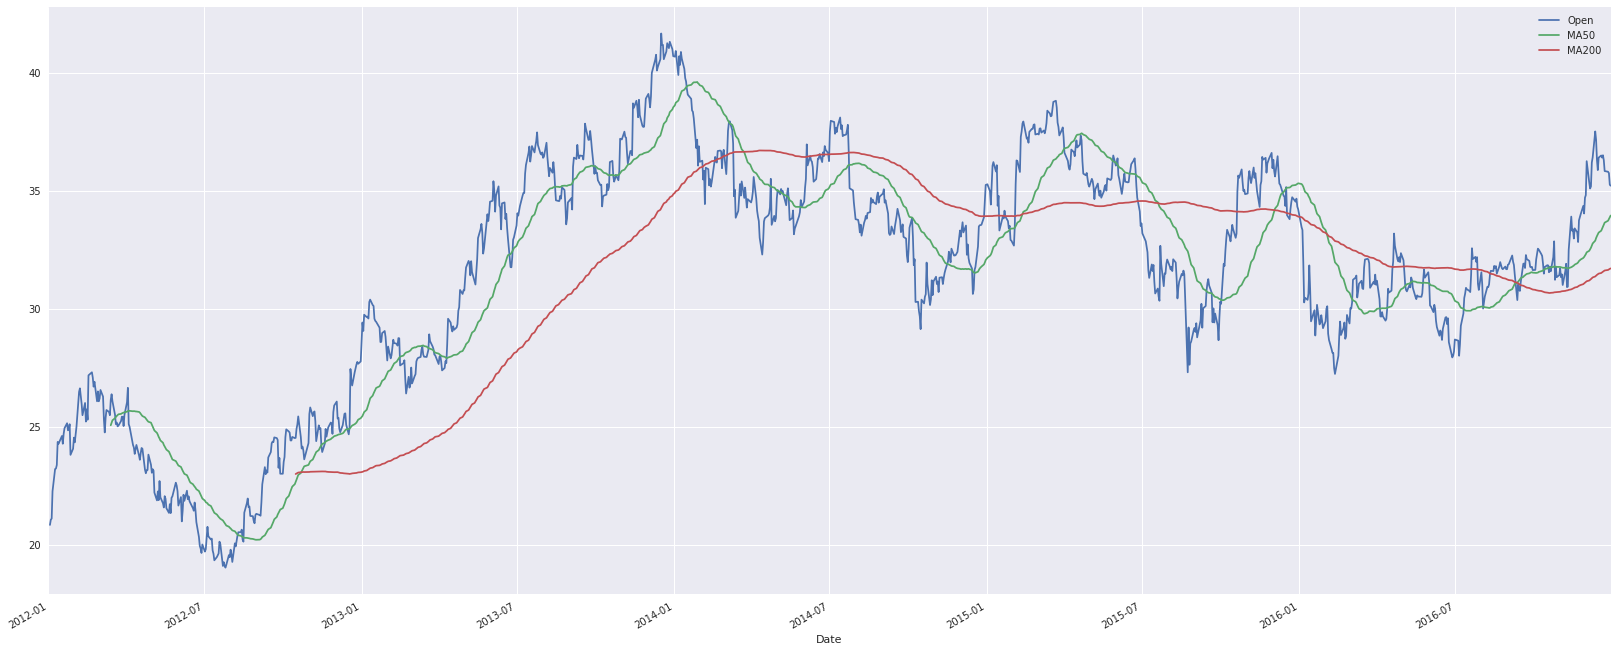

In [25]:
GM[["Open","MA50","MA200"]].plot(figsize=(28,12),xlim=[lower_limit, upper_limit])

## As we see is much less noisy now

## Lets see if there is any co-relation between the stock prices of all these firms as they all in the end belong to the AutoMobile Industry

In [26]:
tesla.all()

Open            True
High            True
Low             True
Close           True
Volume          True
Total Traded    True
MA50            True
MA200           True
dtype: bool

In [27]:
GM.all()

Open            True
High            True
Low             True
Close           True
Volume          True
Total Traded    True
MA50            True
MA200           True
dtype: bool

In [28]:
ford.all()  #Ford has NaN in "Volume" column

Open             True
High             True
Low              True
Close            True
Volume          False
Total Traded     True
MA50             True
MA200            True
dtype: bool

In [29]:
combined_dataframe = pd.DataFrame({'TeslaOpen': tesla['Open'],
                                      'FordOpen': ford['Open'],
                                      'GMOpen': GM['Open']})

In [30]:
combined_dataframe.head()

,FordOpen,GMOpen,TeslaOpen
Date,,,
2012-01-03,11.00,20.83,28.94
2012-01-04,11.15,21.05,28.21
2012-01-05,11.33,21.10,27.76
2012-01-06,11.74,22.26,27.20
2012-01-09,11.83,23.20,27.00


In [31]:
from pandas.plotting import scatter_matrix

[]

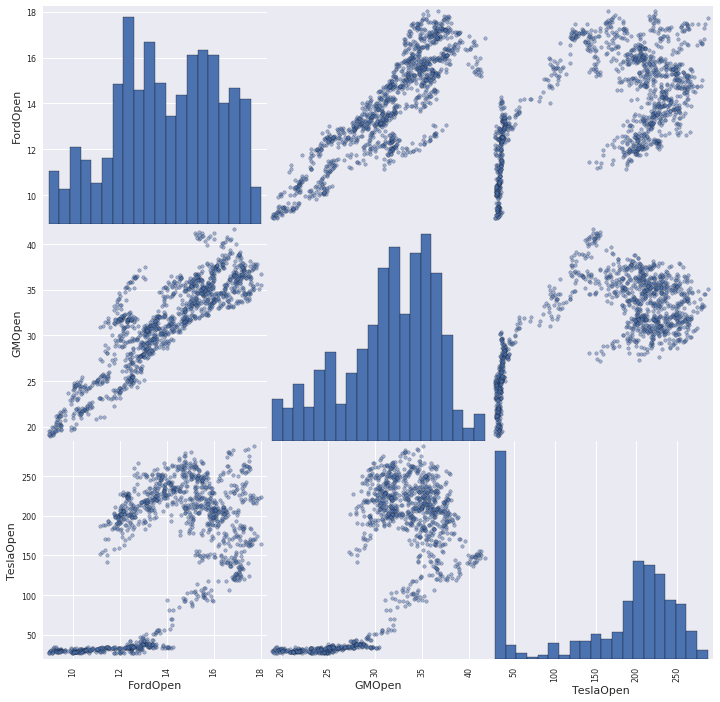

In [32]:
scatter_matrix(combined_dataframe, figsize=(12,12),edgecolor="black",hist_kwds={'bins':20, 'edgecolor':"black"})
plt.plot()

###### Insight:  
###### (1)GMOpen is almost linearly related to FordOpen   
###### (2)Initially there is Insensitivity in Tesla v/s Ford and GM Stock opening prices

## Basic Financial Analysis

### Daily Percentage Change:

$ r_t = \frac{p_t}{p_{t-1}} -1$

By calculating the RETURN [r_t] we can't make future insights but can calculate the VOLATILITY of the stock prices. Using this we can plot a histogram and then can comment on the STABILITY of the stock prices. for this we will use "CLOSING" Stock Prices.

In [33]:
tesla.head()

,Open,High,Low,Close,Volume,Total Traded,MA50,MA200
Date,,,,,,,,
2012-01-03,28.94,29.50,27.65,28.08,928052,26857824.88,NaN,NaN
2012-01-04,28.21,28.67,27.50,27.71,630036,17773315.56,NaN,NaN
2012-01-05,27.76,27.93,26.85,27.12,1005432,27910792.32,NaN,NaN
2012-01-06,27.20,27.79,26.41,26.89,687081,18688603.20,NaN,NaN
2012-01-09,27.00,27.49,26.12,27.25,896951,24217677.00,NaN,NaN


In [38]:
tesla["returns"] = (tesla['Close']/tesla.shift()['Close']) -1  #could have used pct_change as well!!!

In [40]:
ford["returns"] = (ford['Close']/ford.shift()['Close']) -1

In [42]:
GM["returns"] = (GM['Close']/GM.shift()['Close']) -1

In [43]:
tesla.head()

,Open,High,Low,Close,Volume,Total Traded,MA50,MA200,returns
Date,,,,,,,,,
2012-01-03,28.94,29.50,27.65,28.08,928052,26857824.88,NaN,NaN,NaN
2012-01-04,28.21,28.67,27.50,27.71,630036,17773315.56,NaN,NaN,-0.013177
2012-01-05,27.76,27.93,26.85,27.12,1005432,27910792.32,NaN,NaN,-0.021292
2012-01-06,27.20,27.79,26.41,26.89,687081,18688603.20,NaN,NaN,-0.008481
2012-01-09,27.00,27.49,26.12,27.25,896951,24217677.00,NaN,NaN,0.013388


In [44]:
ford.head()

,Open,High,Low,Close,Volume,Total Traded,MA50,MA200,returns
Date,,,,,,,,,
2012-01-03,11.00,11.25,10.99,11.13,45709811,5.028079e+08,NaN,NaN,NaN
2012-01-04,11.15,11.53,11.07,11.30,79725188,8.889358e+08,NaN,NaN,0.015274
2012-01-05,11.33,11.63,11.24,11.59,67877467,7.690517e+08,NaN,NaN,0.025664
2012-01-06,11.74,11.80,11.52,11.71,59840605,7.025287e+08,NaN,NaN,0.010354
2012-01-09,11.83,11.95,11.70,11.80,53981467,6.386008e+08,NaN,NaN,0.007686


In [45]:
GM.head()

,Open,High,Low,Close,Volume,Total Traded,MA50,MA200,returns
Date,,,,,,,,,
2012-01-03,20.83,21.18,20.75,21.05,9321420,1.941652e+08,NaN,NaN,NaN
2012-01-04,21.05,21.37,20.75,21.15,7856752,1.653846e+08,NaN,NaN,0.004751
2012-01-05,21.10,22.29,20.96,22.17,17884040,3.773532e+08,NaN,NaN,0.048227
2012-01-06,22.26,23.03,22.24,22.92,18234608,4.059024e+08,NaN,NaN,0.033829
2012-01-09,23.20,23.43,22.70,22.84,12091714,2.805278e+08,NaN,NaN,-0.003490


Text(0.5,1,'Return of Tesla Stocks')

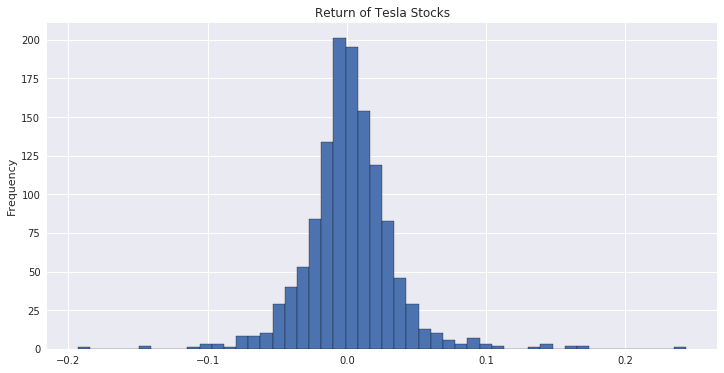

In [50]:
tesla["returns"].plot(kind="hist",bins=50,edgecolor="black",figsize=(12,6))
plt.title("Return of Tesla Stocks")

Text(0.5,1,'Return of Ford Stocks')

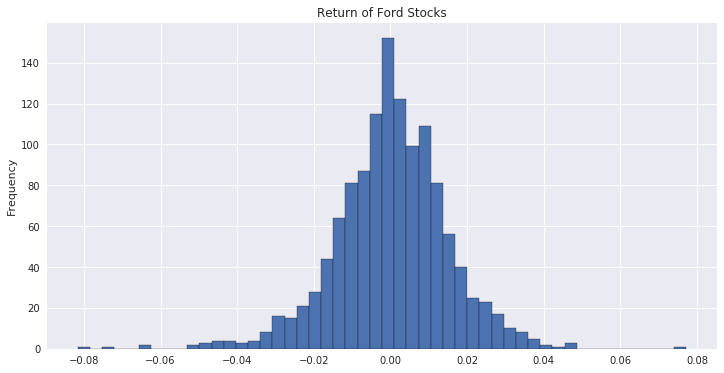

In [51]:
ford["returns"].plot(kind="hist",bins=50,edgecolor="black",figsize=(12,6))
plt.title("Return of Ford Stocks")

Text(0.5,1,'Return of GM Stocks')

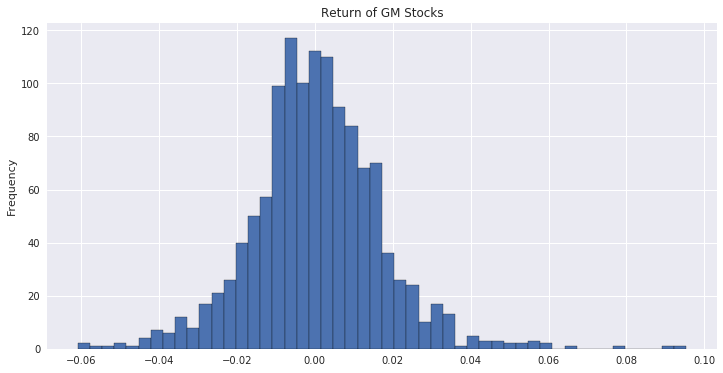

In [52]:
GM["returns"].plot(kind="hist",bins=50,edgecolor="black",figsize=(12,6))
plt.title("Return of GM Stocks")

### We can compare on the same Histogram as well!

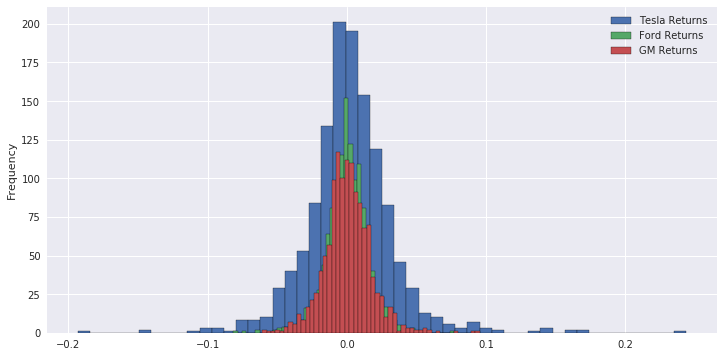

In [59]:
tesla["returns"].plot(kind="hist",bins=50,edgecolor="black",figsize=(12,6),label="Tesla Returns")
ford["returns"].plot(kind="hist",bins=50,edgecolor="black",figsize=(12,6),label="Ford Returns")
GM["returns"].plot(kind="hist",bins=50,edgecolor="black",figsize=(12,6),label="GM Returns")
plt.legend()

### We conclude:
(1) Tesla is most stable but at slightly NEGATIVE return<br>
(2) GM Stocks are most VOLATILE<br>
(3) Frequency of higher return is more at Tesla as compared to others<br>